In [11]:
# Install necessary packages
!pip install prophet
!pip install statsmodels
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import get_rdataset
from prophet import Prophet

In [21]:
# Load the AirPassengers dataset
airpass = get_rdataset("AirPassengers", "datasets")

airpass = pd.DataFrame(airpass.data["value"])
airpass.index = pd.date_range(start = "1949-01", periods = len(airpass.index), freq = "M").to_period()
airpass.index = airpass.index.to_timestamp()
airpass.head()

C:\Users\salmank\AppData\Local\Temp\ipykernel_17844\3894343770.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  airpass.index = pd.date_range(start = "1949-01", periods = len(airpass.index), freq = "M").to_period()


,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


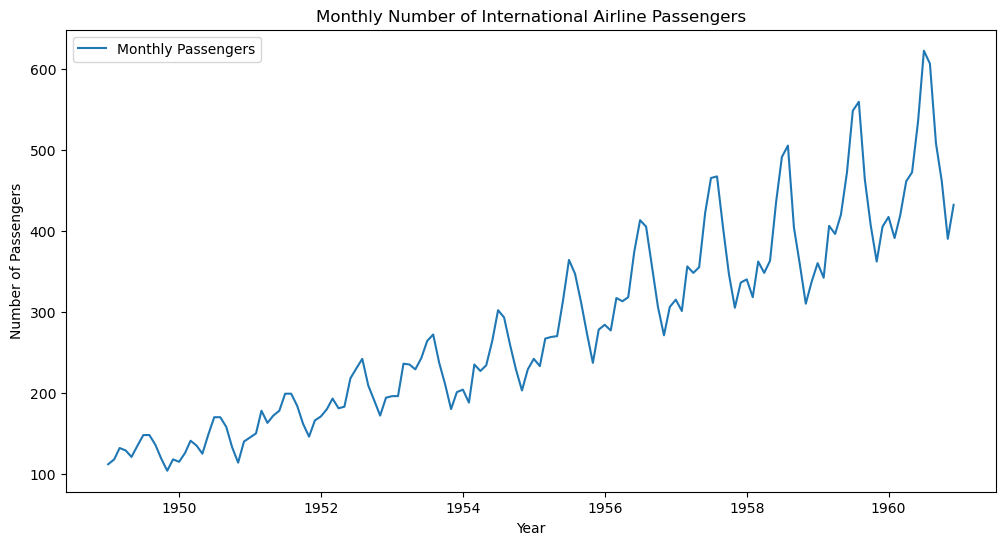

In [22]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(airpass, label='Monthly Passengers')
plt.title('Monthly Number of International Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

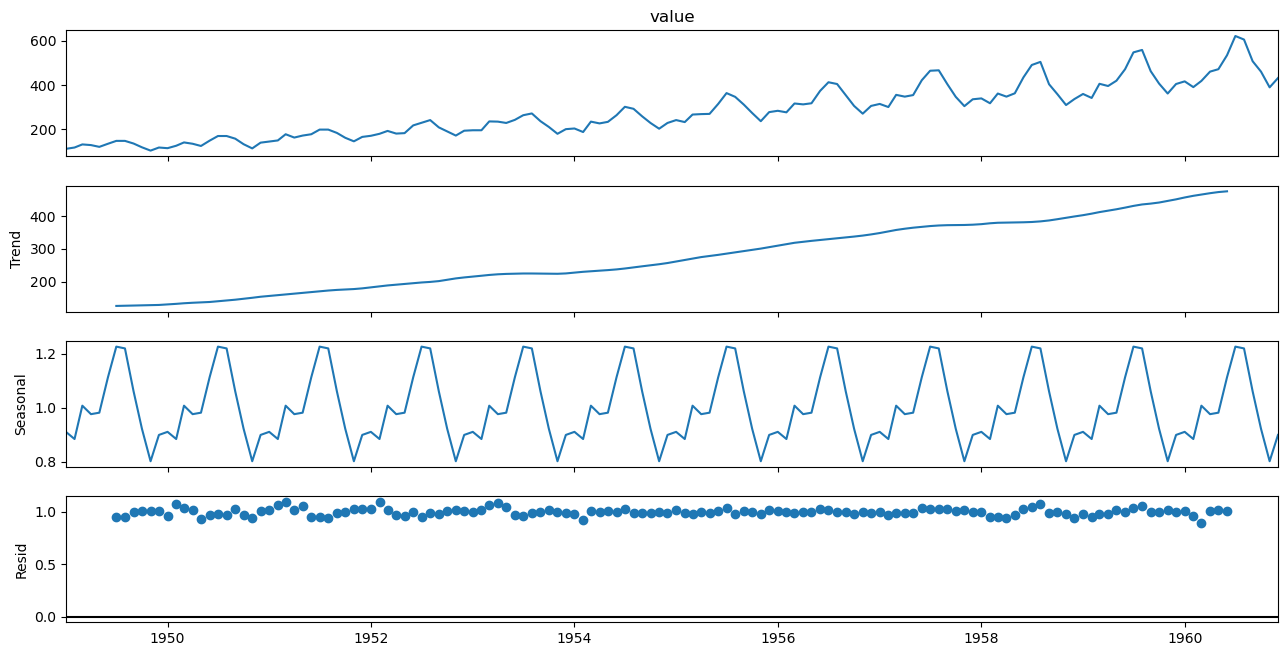

In [23]:
# Plot the seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(airpass['value'], model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

In [24]:
# Reset the index and rename columns for Prophet
data = airpass
data.reset_index(inplace=True)
data.columns = ['ds', 'y']
data

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [29]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(data)
model

20:56:38 - cmdstanpy - INFO - Chain [1] start processing
20:56:38 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=24, freq='M')  # Extend the prediction for 2 more years

# Predict the future values
forecast = model.predict(future)
forecast

c:\Users\salmank\anaconda3\envs\pymc_env_5\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,56.627239,114.301162,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,47.762607,109.350970,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,82.563250,137.347213,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,80.101735,136.039533,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,80.695904,139.125050,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1962-07-31,545.627230,584.286645,640.722041,544.327422,546.799603,66.507697,66.507697,66.507697,66.507697,66.507697,66.507697,0.0,0.0,0.0,612.134927
164,1962-08-31,548.744625,536.427411,594.181151,547.325637,550.020946,17.544382,17.544382,17.544382,17.544382,17.544382,17.544382,0.0,0.0,0.0,566.289007
165,1962-09-30,551.761458,499.390220,559.532882,550.223178,553.137245,-22.647365,-22.647365,-22.647365,-22.647365,-22.647365,-22.647365,0.0,0.0,0.0,529.114093
166,1962-10-31,554.878853,470.911726,529.165480,553.259840,556.366633,-54.849787,-54.849787,-54.849787,-54.849787,-54.849787,-54.849787,0.0,0.0,0.0,500.029066


c:\Users\salmank\anaconda3\envs\pymc_env_5\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\salmank\anaconda3\envs\pymc_env_5\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


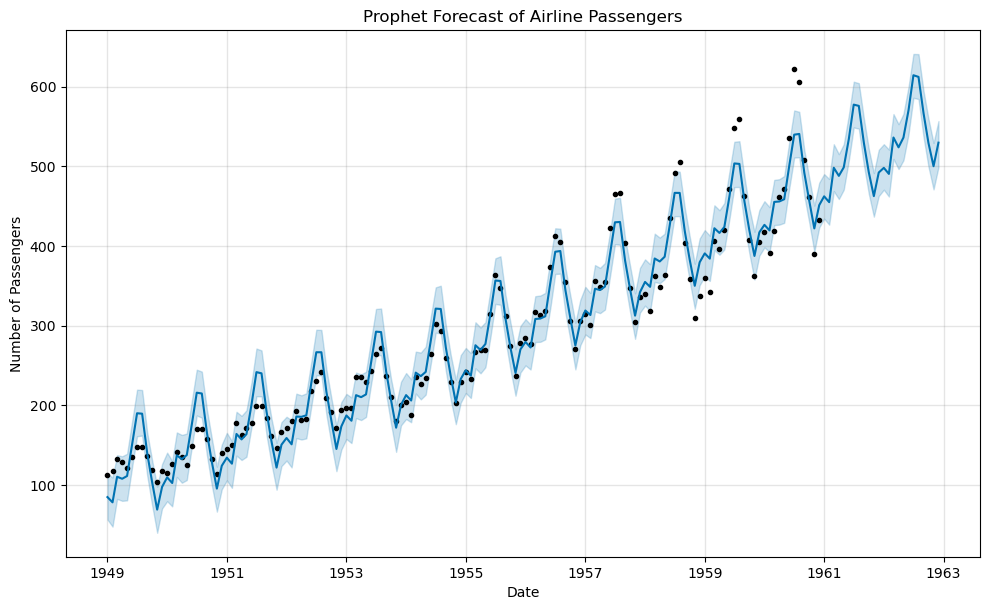

c:\Users\salmank\anaconda3\envs\pymc_env_5\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\salmank\anaconda3\envs\pymc_env_5\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\salmank\anaconda3\envs\pymc_env_5\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

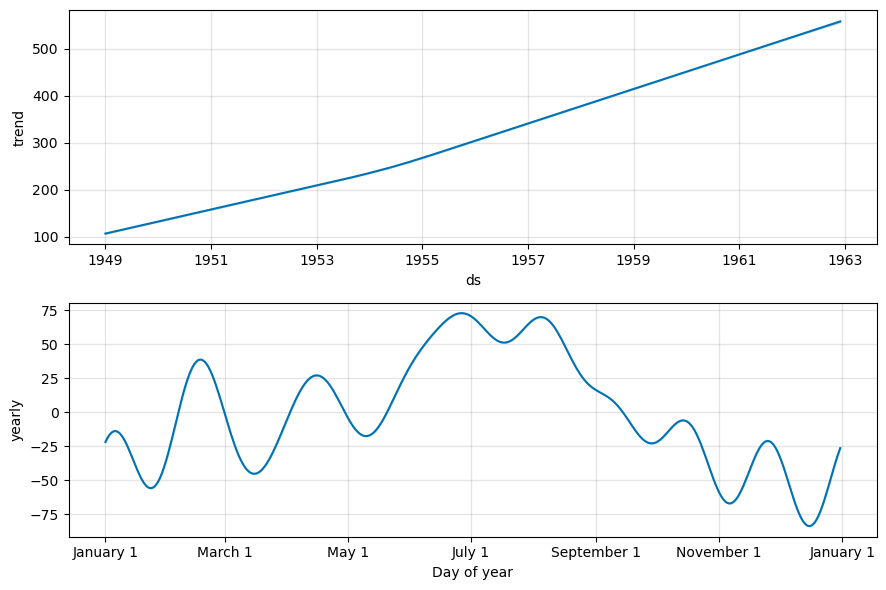

In [28]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Prophet Forecast of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()